Si_Ws_100K

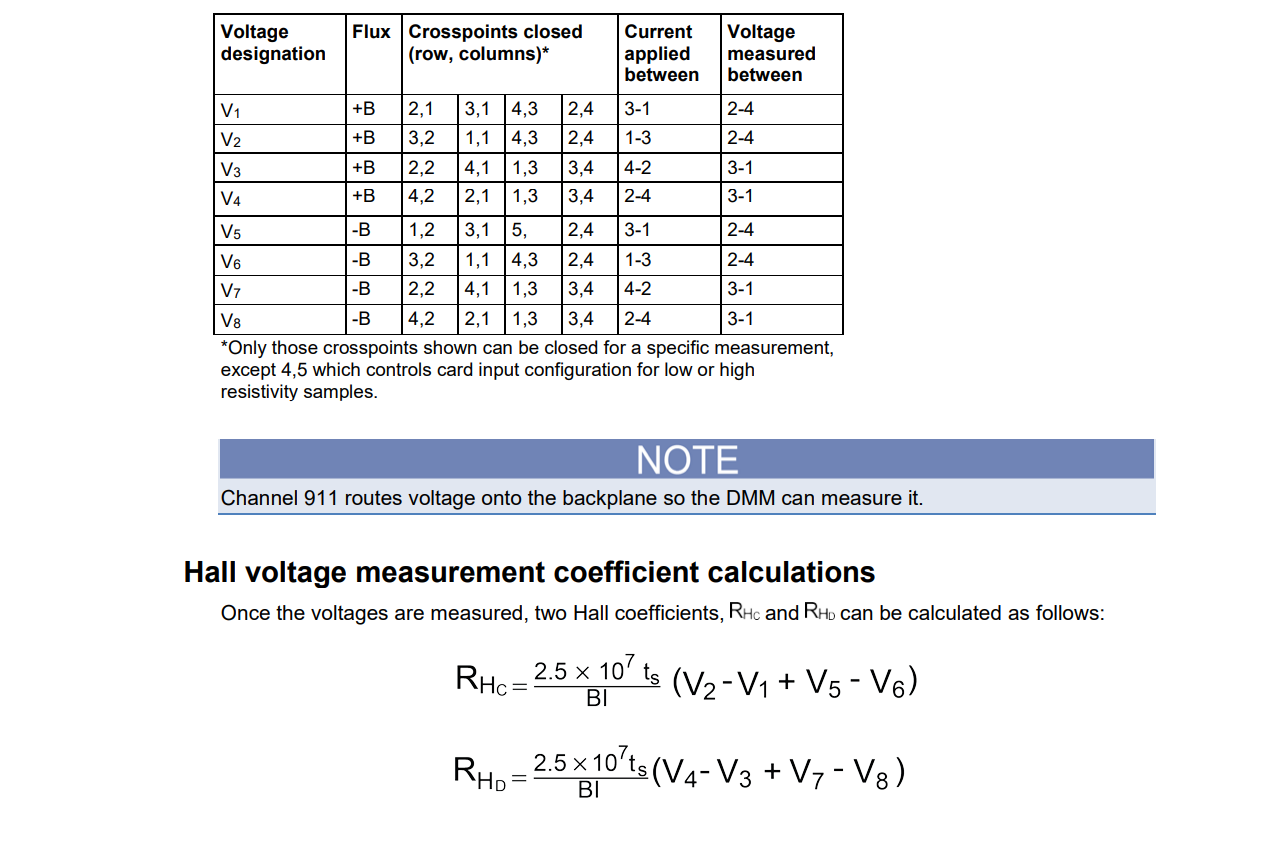

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
filename='C:\\Users\\Admin\\Desktop\\Data\\Si_Ws\\Si_Ws\\Si_Ws_100K.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value','multiplier'])
df


,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.00001,60000.500977,99.999821,0.001020,0.000997,0.006244,0.006229,-0.000510,1.0
1,0.00001,59000.558789,99.999705,0.000955,0.001081,0.006299,0.006235,-0.000548,1.0
2,0.00001,58000.438281,100.000050,0.001033,0.001035,0.006279,0.006220,-0.000545,1.0
3,0.00001,57000.313867,100.000200,0.001015,0.001049,0.006249,0.006242,-0.000563,1.0
4,0.00001,56000.442578,100.000244,0.000943,0.001083,0.006296,0.006196,-0.000556,1.0
...,...,...,...,...,...,...,...,...,...
237,0.00001,56000.254687,100.000089,0.000908,0.000975,0.005931,0.005958,-0.000578,1.0
238,0.00001,57000.535547,100.000168,0.000876,0.001017,0.005925,0.005946,-0.000561,1.0
239,0.00001,58000.545898,100.000088,0.000855,0.000961,0.005927,0.005913,-0.000562,1.0
240,0.00001,59000.280273,100.000317,0.000905,0.001031,0.005952,0.005910,-0.000573,1.0


### Converting B to integer B

In [3]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B', 'B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [4]:
df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.00001,60000.500977,60000,99.999821,0.001020,0.000997,0.006244,0.006229,-0.000510,1.0
1,0.00001,59000.558789,59000,99.999705,0.000955,0.001081,0.006299,0.006235,-0.000548,1.0
2,0.00001,58000.438281,58000,100.000050,0.001033,0.001035,0.006279,0.006220,-0.000545,1.0
3,0.00001,57000.313867,57000,100.000200,0.001015,0.001049,0.006249,0.006242,-0.000563,1.0
4,0.00001,56000.442578,56000,100.000244,0.000943,0.001083,0.006296,0.006196,-0.000556,1.0


In [5]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

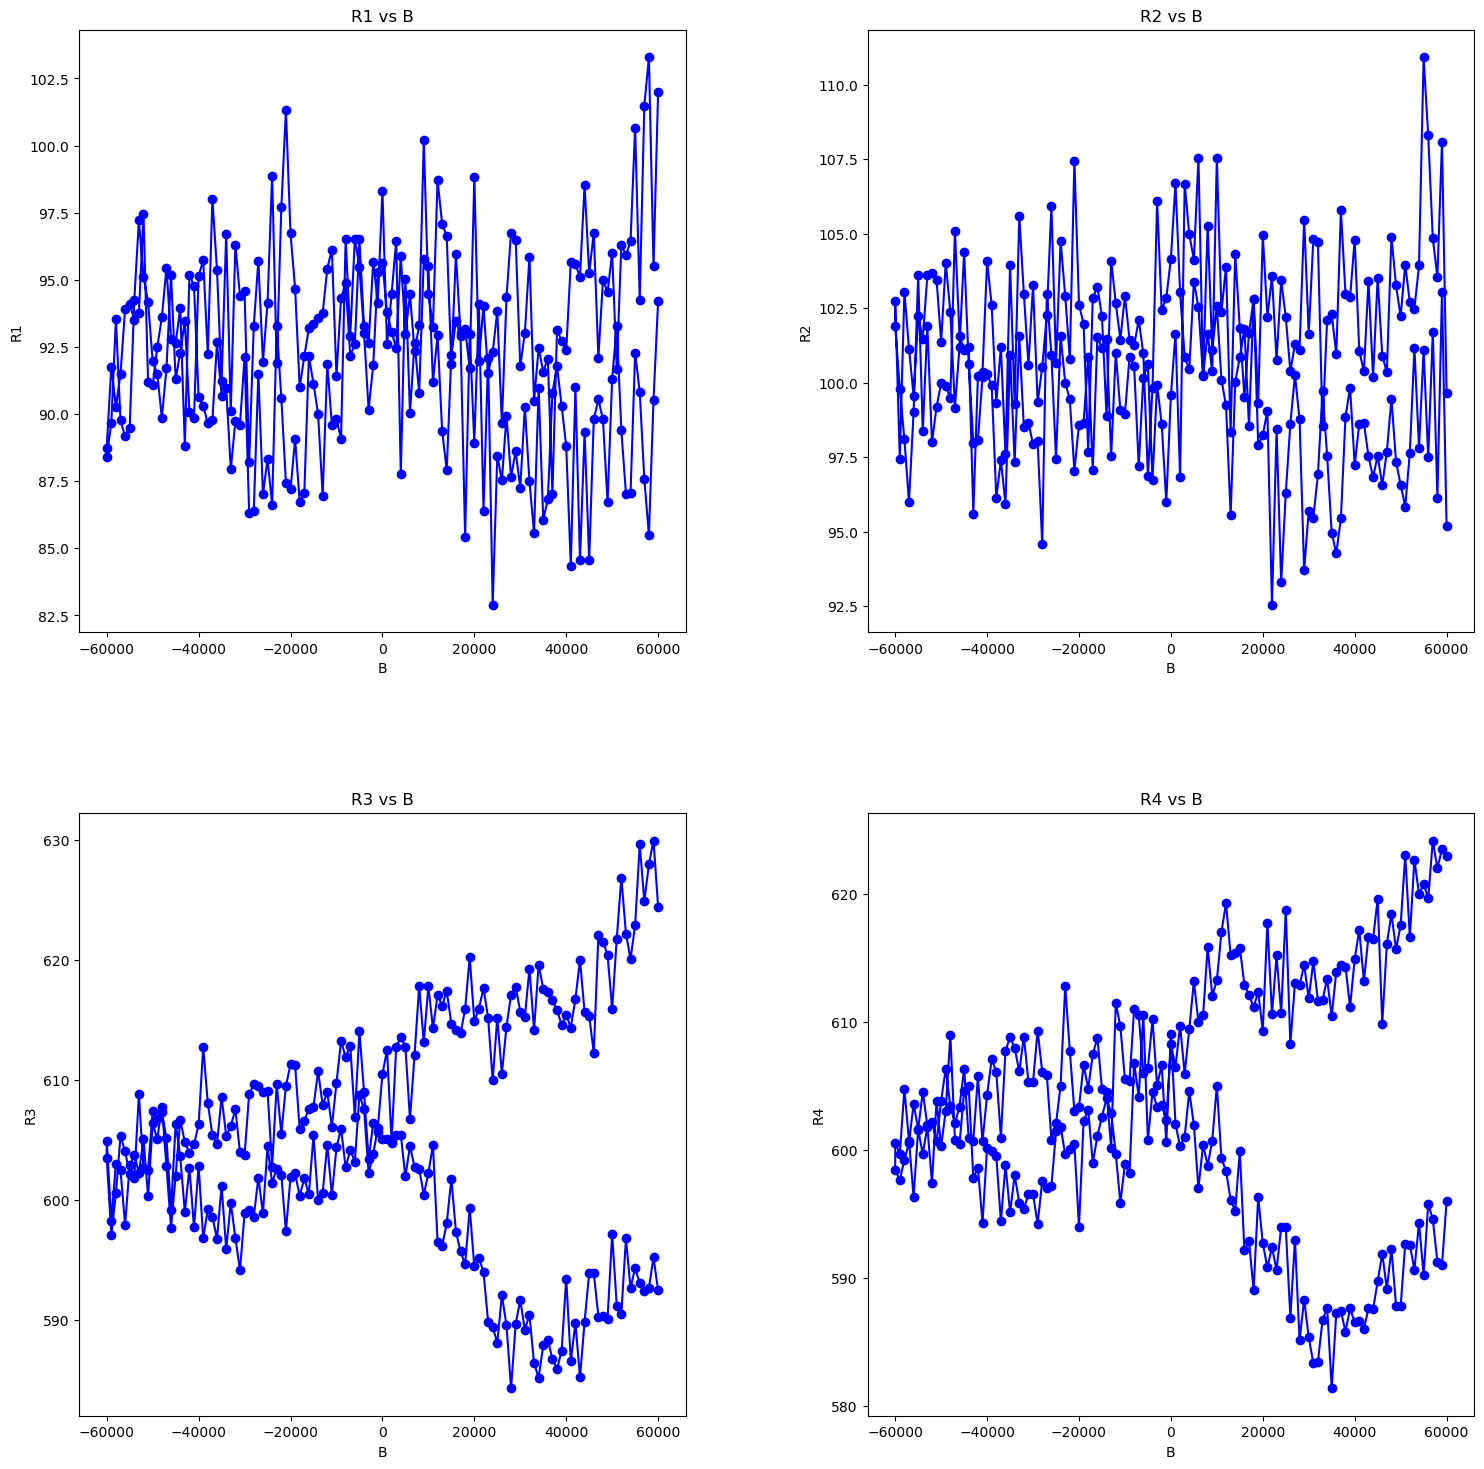

In [6]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [7]:
# B_max = max(df['B_int'])
# B_max_first_idx = 0
# for i in range(len(df)):
#     if df.iloc[i].B_int == B_max:
#         B_max_first_idx = i
#         break
# B_max_first_idx

In [8]:
# df = df.iloc[B_max_first_idx+1:].copy()
# df.reset_index(inplace = True, drop = True) # resetting index

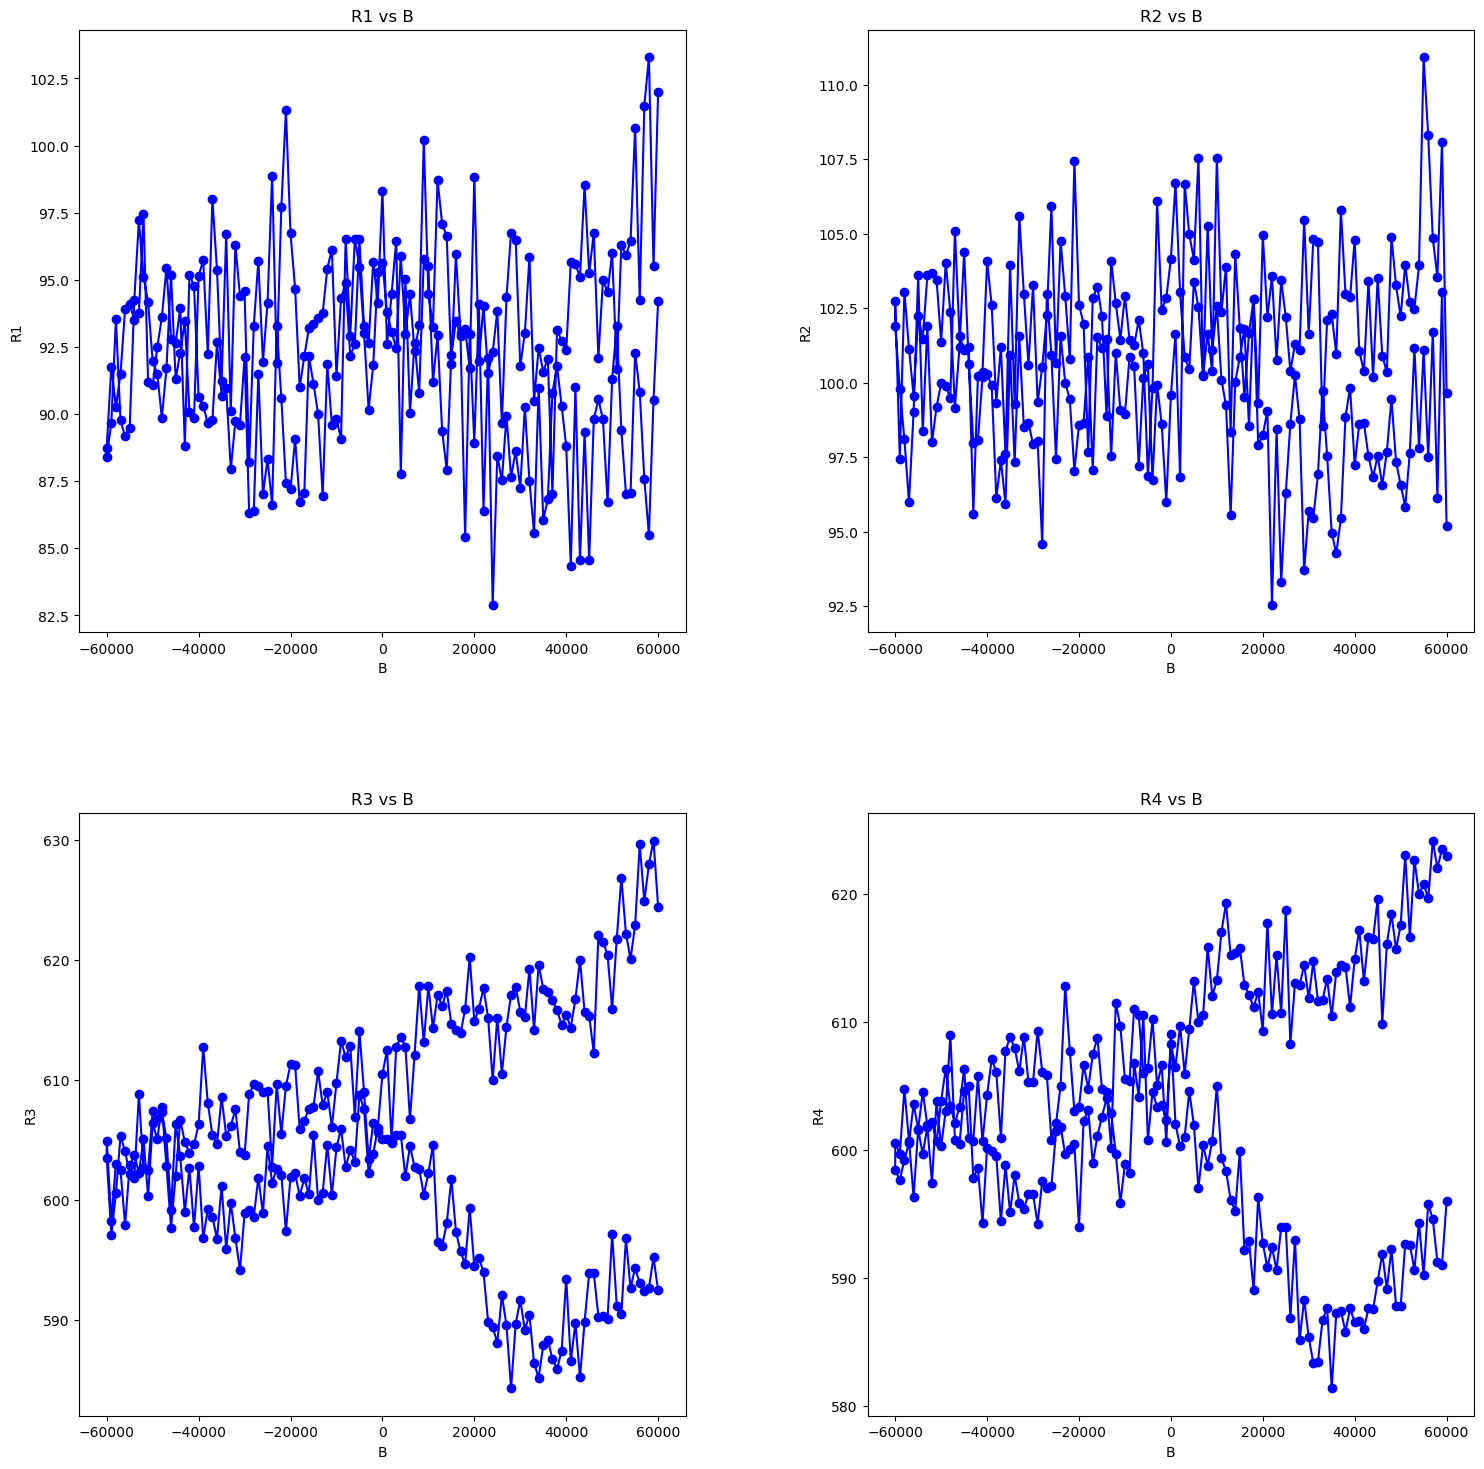

In [9]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [10]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

60000 -60000


In [11]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

120

In [12]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [13]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.00001,60000.500977,60000,99.999821,0.001020,0.000997,0.006244,0.006229,-0.000510,1.0
1,0.00001,59000.558789,59000,99.999705,0.000955,0.001081,0.006299,0.006235,-0.000548,1.0
2,0.00001,58000.438281,58000,100.000050,0.001033,0.001035,0.006279,0.006220,-0.000545,1.0
3,0.00001,57000.313867,57000,100.000200,0.001015,0.001049,0.006249,0.006242,-0.000563,1.0
4,0.00001,56000.442578,56000,100.000244,0.000943,0.001083,0.006296,0.006196,-0.000556,1.0


In [14]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
121,0.00001,-60000.177734,-60000,100.000151,0.000884,0.001019,0.006049,0.005984,-0.000575,1.0
122,0.00001,-59000.336914,-59000,100.000517,0.000897,0.000998,0.005983,0.005976,-0.000566,1.0
123,0.00001,-58000.317578,-58000,99.999882,0.000935,0.000981,0.006030,0.005992,-0.000572,1.0
124,0.00001,-57000.621680,-57000,100.000082,0.000898,0.000960,0.006025,0.006005,-0.000573,1.0
125,0.00001,-56000.452344,-56000,100.000224,0.000892,0.000990,0.005979,0.006036,-0.000578,1.0


In [15]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [16]:
data = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data = data[data['B_int_x'] == -1*data['B_int_y']] # selecting 
data = data[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data.reset_index(inplace = True, drop = True) # resetting index
data.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.00001,60000,99.999821,0.001020,0.000997,0.006244,0.006229,0.000884,0.001019,0.006049,0.005984,1.0
1,0.00001,59000,99.999705,0.000955,0.001081,0.006299,0.006235,0.000897,0.000998,0.005983,0.005976,1.0
2,0.00001,58000,100.000050,0.001033,0.001035,0.006279,0.006220,0.000935,0.000981,0.006030,0.005992,1.0
3,0.00001,57000,100.000200,0.001015,0.001049,0.006249,0.006242,0.000898,0.000960,0.006025,0.006005,1.0
4,0.00001,56000,100.000244,0.000943,0.001083,0.006296,0.006196,0.000892,0.000990,0.005979,0.006036,1.0


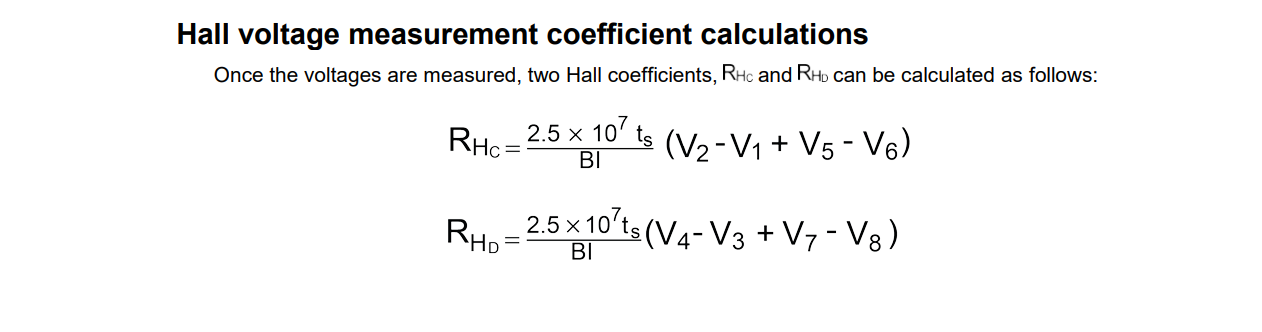
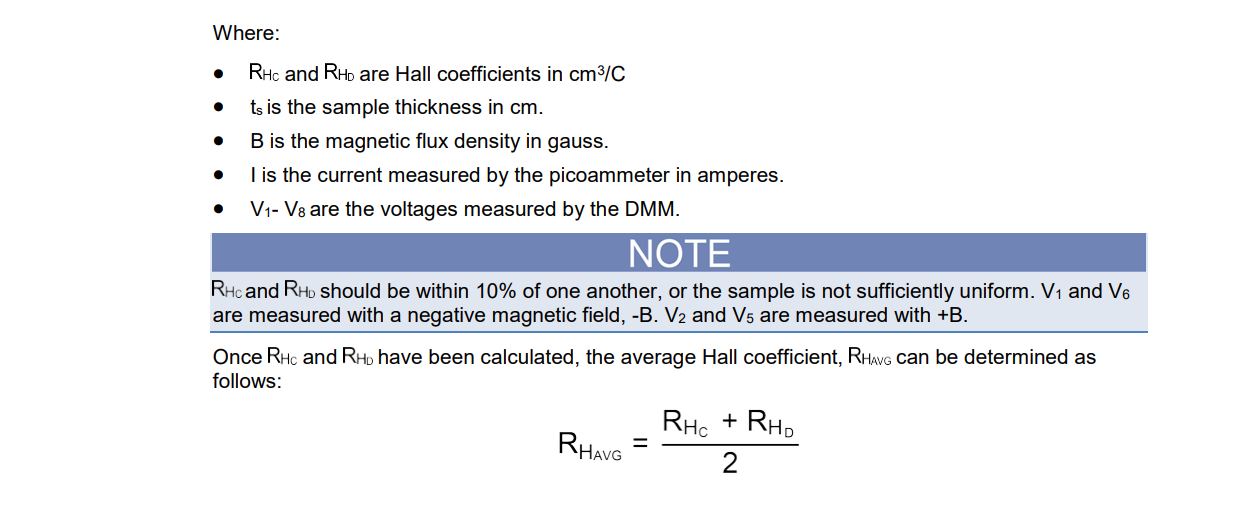

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [17]:
data['RHc'] = (data['V2'] - data['V1'] + data['V5'] - data['V6'])/(data['I']*data['multiplier'])
data['RHd'] = (data['V4'] - data['V3'] + data['V7'] - data['V8'])/(data['I']*data['multiplier'])
data['R'] = (data['RHc'] + data['RHd'])/2

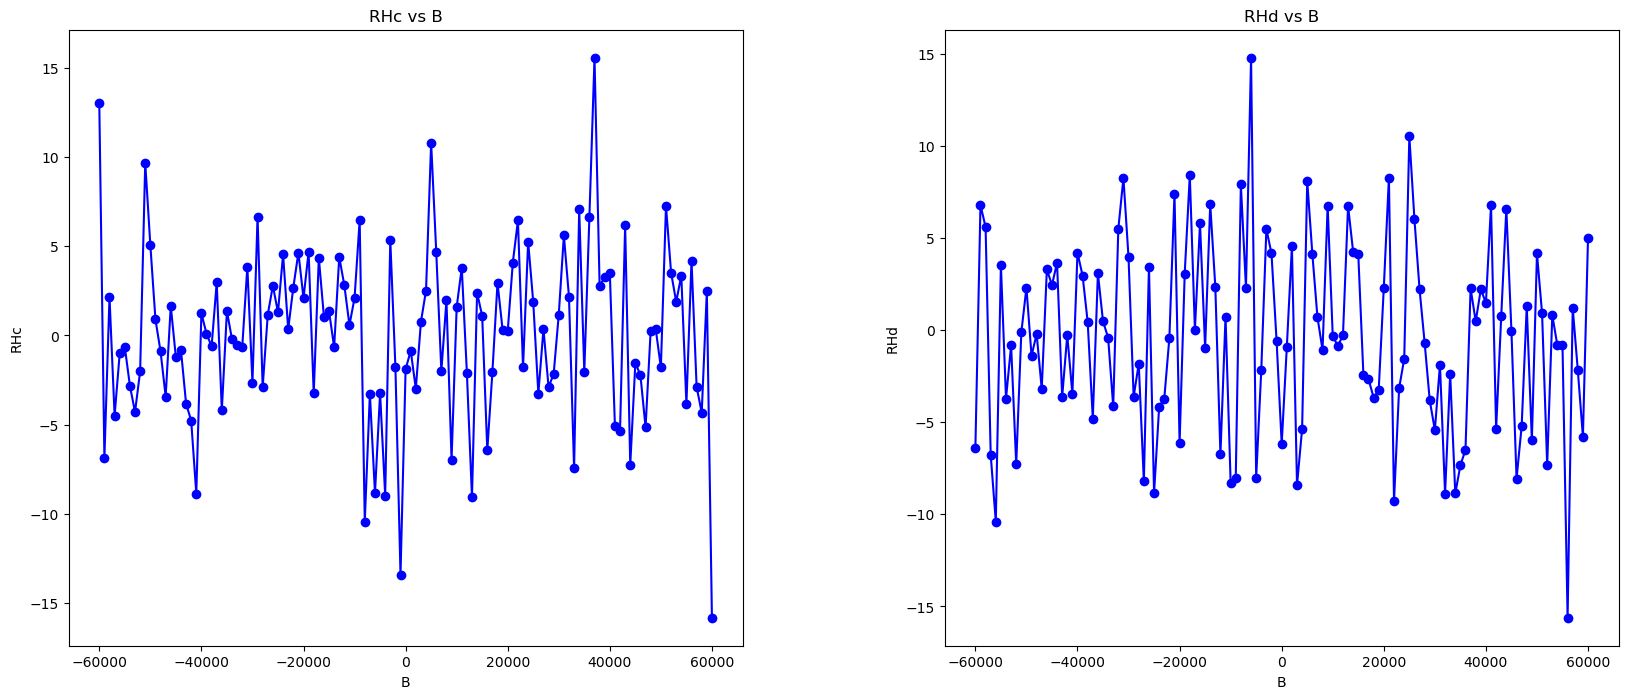

In [18]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data['B'],data['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data['B'],data['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

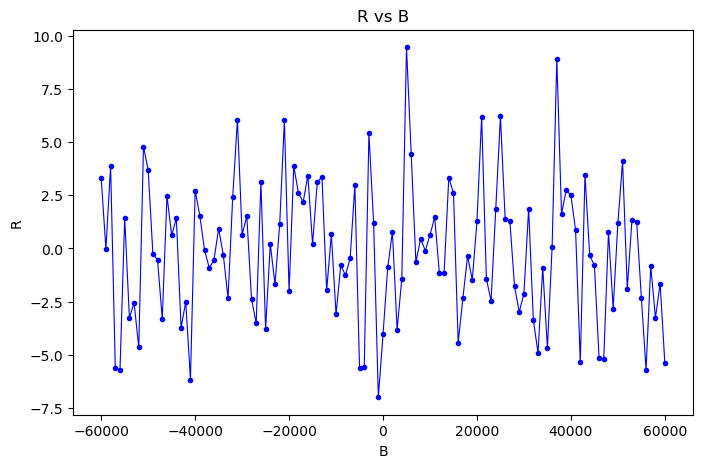

In [19]:
plt.figure(figsize=(8,5))
plt.plot(data['B'],data['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [20]:
data2 = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data2 = data2[data2['B_int_x'] == -1*data2['B_int_y']] # selecting 
data2 = data2[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data2.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data2.reset_index(inplace = True, drop = True) # resetting index
data2.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.00001,-60000,100.000151,0.000884,0.001019,0.006049,0.005984,0.001020,0.000997,0.006244,0.006229,1.0
1,0.00001,-59000,100.000517,0.000897,0.000998,0.005983,0.005976,0.000955,0.001081,0.006299,0.006235,1.0
2,0.00001,-58000,99.999882,0.000935,0.000981,0.006030,0.005992,0.001033,0.001035,0.006279,0.006220,1.0
3,0.00001,-57000,100.000082,0.000898,0.000960,0.006025,0.006005,0.001015,0.001049,0.006249,0.006242,1.0
4,0.00001,-56000,100.000224,0.000892,0.000990,0.005979,0.006036,0.000943,0.001083,0.006296,0.006196,1.0


### Hall resistance calculation

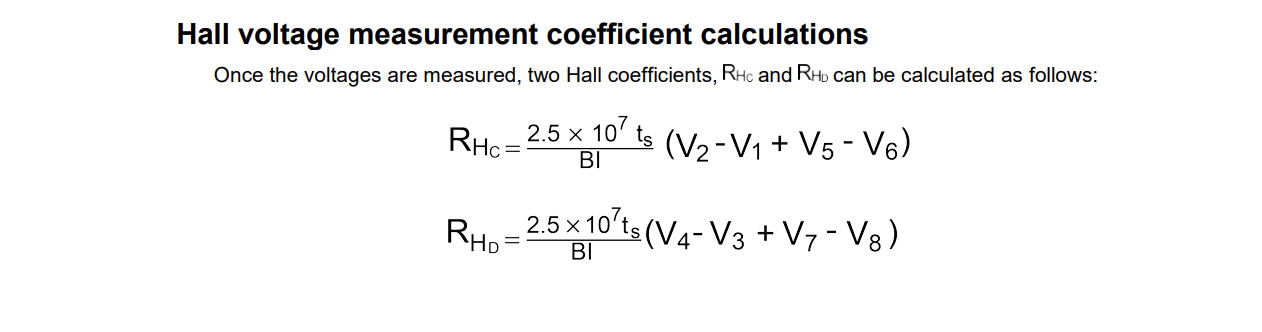

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [21]:
data2['RHc'] = (data2['V2'] - data2['V1'] + data2['V5'] - data2['V6'])/(data2['I']*data2['multiplier'])
data2['RHd'] = (data2['V4'] - data2['V3'] + data2['V7'] - data2['V8'])/(data2['I']*data2['multiplier'])

data2['R'] = (data2['RHc'] + data2['RHd'])/2

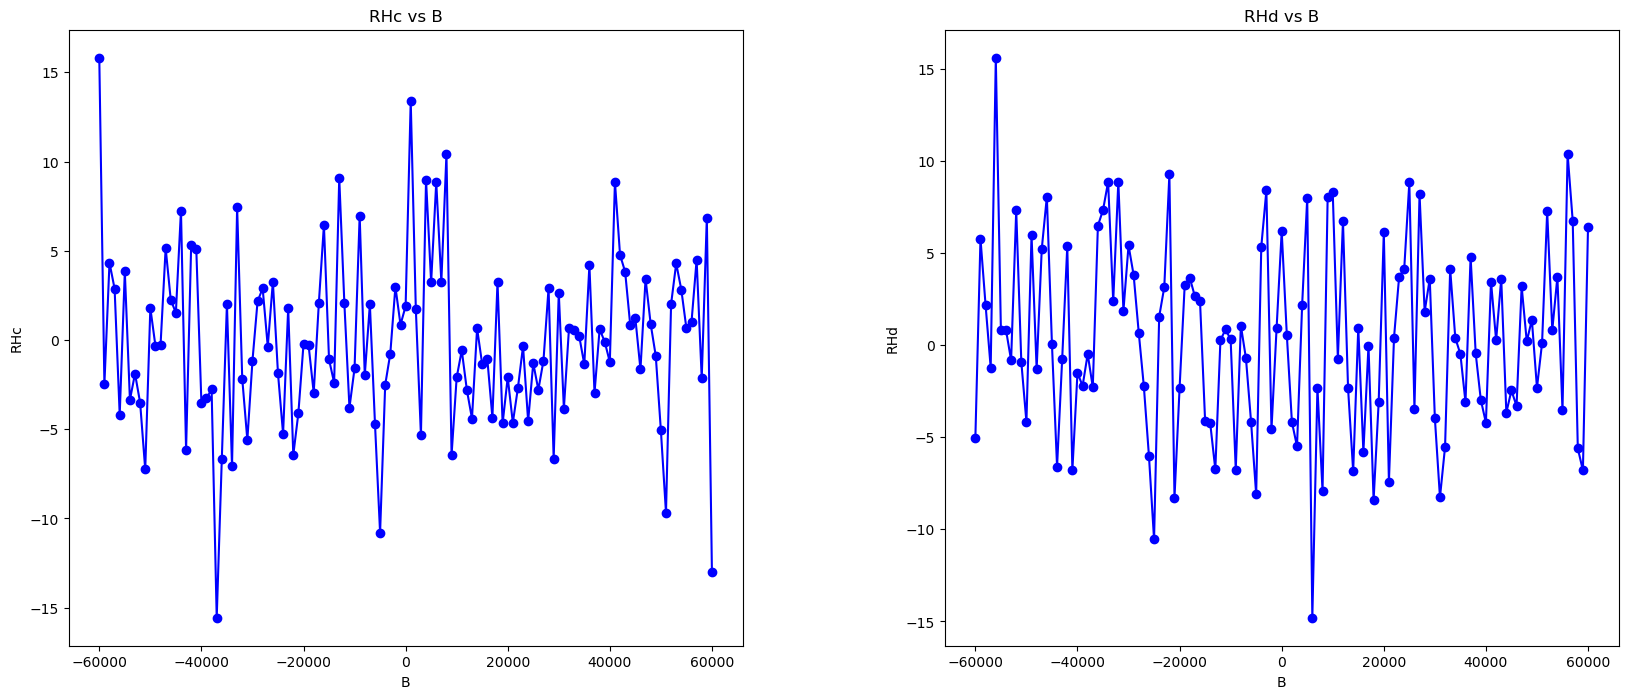

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data2['B'],data2['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data2['B'],data2['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

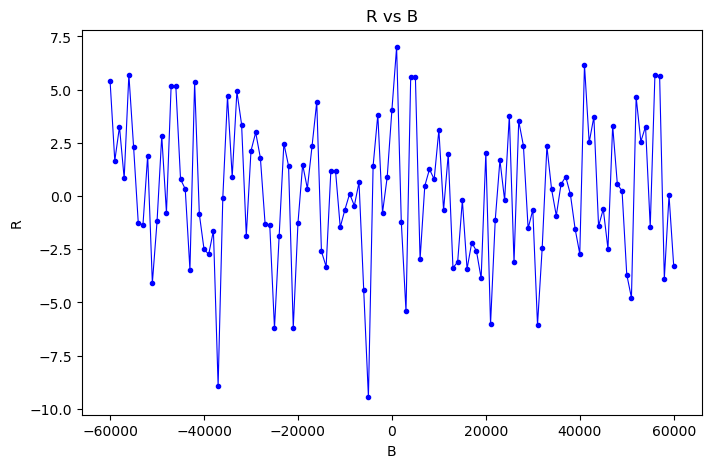

In [23]:
plt.figure(figsize=(8,5))
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

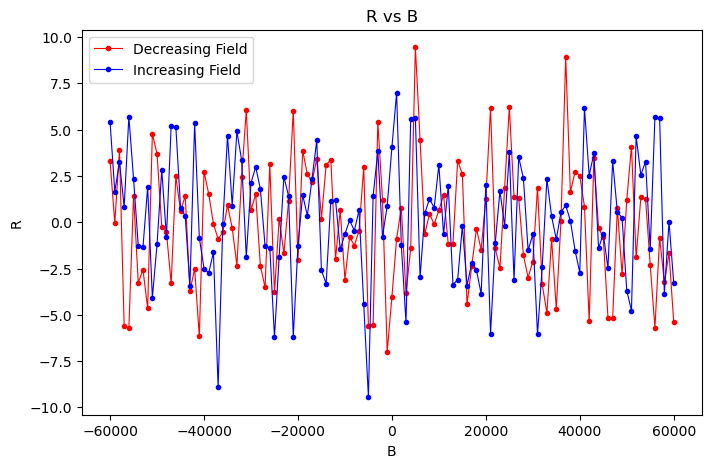

In [24]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()